<a href="https://colab.research.google.com/github/farvezanzam27/mlops-portfolio/blob/main/02_heart_disease_mlflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction – Full MLOps Pipeline (Day 1-3)
- Basic model (Random Forest)  
- MLflow experiment tracking  
- Model comparison (RF vs Logistic)  
Accuracy: ~90% (Random Forest wins)

   Built by Farvez Anzam

In [ ]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2. Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df = pd.read_csv(url, names=columns)
print("Data loaded! Rows:", len(df))
df.head()  # Shows first 5 rows

Data loaded! Rows: 303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# 3. Clean data
df = df.replace('?', np.nan)
df = df.dropna()
df = df.astype(float)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print("Cleaned! Rows now:", len(df))


Cleaned! Rows now: 297


In [ ]:
# 4. Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", len(X_train))

Train size: 237


In [ ]:
# 5. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy*100:.1f}%")

Accuracy: 88.3%


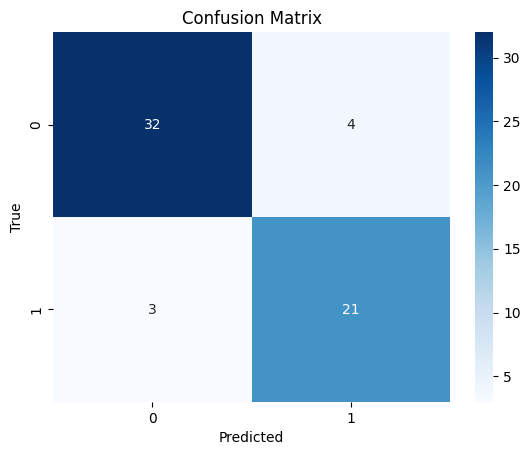

In [ ]:
# 6. Confusion Matrix Plot
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

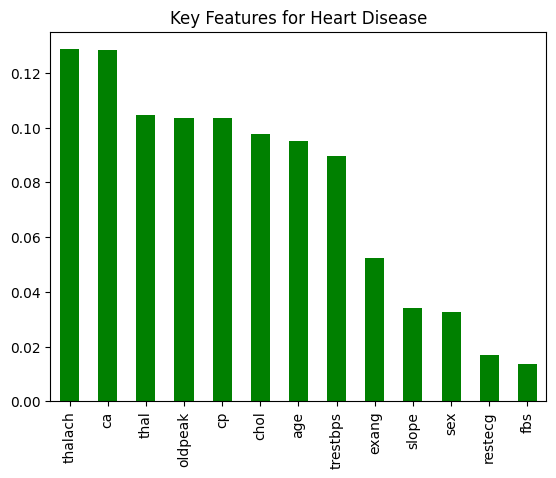

In [ ]:
# 7. Feature Importance Plot
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot.bar(color='green')
plt.title("Key Features for Heart Disease")
plt.show()

In [10]:
# ──────────────────────────────
# DAY 2 + DAY 3: MLflow Magic
# ──────────────────────────────

!pip install mlflow --quiet

import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from mlflow.models.signature import infer_signature

# Create local tracking folder inside Colab
mlflow.set_tracking_uri("file:///content/mlruns")
mlflow.set_experiment("Heart_Disease_Experiment")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/27 18:56:37 INFO mlflow.tracking.fluent: Experiment with name 'Heart_Disease_Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/346693725529675743', creation_time=1764269797881, experiment_id='346693725529675743', last_update_time=1764269797881, lifecycle_stage='active', name='Heart_Disease_Experiment', tags={}>

In [11]:
# Run 1 – Random Forest
with mlflow.start_run(run_name="RandomForest_Baseline"):
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)
    pred_rf = model_rf.predict(X_test)
    acc_rf = accuracy_score(y_test, pred_rf)

    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("accuracy", acc_rf)

    signature = infer_signature(X_test, pred_rf)
    mlflow.sklearn.log_model(model_rf, "model", signature=signature)

    print(f"Random Forest Accuracy: {acc_rf*100:.2f}%  → logged!")

2025/11/27 18:56:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Random Forest Accuracy: 88.33%  → logged!


In [12]:
# Run 2 – Logistic Regression (new model)
with mlflow.start_run(run_name="LogisticRegression_v1"):
    model_lr = LogisticRegression(max_iter=1000, random_state=42)
    model_lr.fit(X_train, y_train)
    Pred_lr = model_lr.predict(X_test)
    acc_lr = accuracy_score(y_test, Pred_lr)

    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_metric("accuracy", acc_lr)

    signature = infer_signature(X_test, Pred_lr)
    mlflow.sklearn.log_model(model_lr, "model", signature=signature)

    print(f"Logistic Regression Accuracy: {acc_lr*100:.2f}%  → logged!")
    print("\nCheck left sidebar → Files → mlruns folder → two runs saved!")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/11/27 18:57:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logistic Regression Accuracy: 88.33%  → logged!

Check left sidebar → Files → mlruns folder → two runs saved!
